In [67]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings

In [68]:
data = pd.read_csv('HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## **Data Cleaning Steps**

In [69]:
# Deleting Redundant Columns
redundant_columns = ['EmployeeCount', 'Over18', 'StandardHours']
data.drop(columns=redundant_columns, inplace=True)

# Renaming Columns for Better Readability
# Define a dictionary for renaming columns
rename_columns = {
    'DailyRate': 'Daily_Rate', 'DistanceFromHome': 'Distance_From_Home', 'EducationField': 'Education_Field',
    'EmployeeNumber': 'Employee_Number', 'EnvironmentSatisfaction': 'Environment_Satisfaction',
    'JobInvolvement': 'Job_Involvement', 'JobLevel': 'Job_Level', 'JobRole': 'Job_Role',
    'JobSatisfaction': 'Job_Satisfaction', 'MaritalStatus': 'Marital_Status',
    'MonthlyIncome': 'Monthly_Income', 'MonthlyRate': 'Monthly_Rate', 'NumCompaniesWorked': 'Num_Companies_Worked',
    'OverTime': 'Over_Time', 'PercentSalaryHike': 'Percent_Salary_Hike',
    'PerformanceRating': 'Performance_Rating',
    'RelationshipSatisfaction': 'Relationship_Satisfaction',
    'StockOptionLevel': 'Stock_Option_Level', 'TotalWorkingYears': 'Total_Working_Years',
    'TrainingTimesLastYear': 'Training_Times_Last_Year', 'WorkLifeBalance': 'Work_Life_Balance',
    'YearsAtCompany': 'Years_At_Company', 'YearsInCurrentRole': 'Years_In_Current_Role',
    'YearsSinceLastPromotion': 'Years_Since_Last_Promotion',
    'YearsWithCurrManager': 'Years_With_Current_Manager'
}

data.rename(columns=rename_columns, inplace=True)

# Dropping Duplicates
data.drop_duplicates(inplace=True)

# Cleaning Individual Columns
data['Marital_Status'] = data['Marital_Status'].replace({'Married': 'Married', 'Single': 'Single', 'Divorced': 'Divorced'})

# Check for any outliers or invalid values in numerical columns (example: 'Age')
# Here we'll remove ages that are not within a realistic working age range
data = data[(data['Age'] >= 18) & (data['Age'] <= 65)]

# For 'Education' and other ordinal variables, ensure they fall within expected categories
valid_education_levels = [1, 2, 3, 4, 5]  # Assuming 1 to 5 are valid levels
data = data[data['Education'].isin(valid_education_levels)]

# Drop rows with any NaN values
data.dropna(inplace=True)

In [70]:
#Select the required columns for correlation analysis
selected_columns = [
    'Over_Time', 'Marital_Status', 'Job_Role', 'Gender', 'Education_Field',
    'Department', 'BusinessTravel', 'Age', 'Total_Working_Years',
    'Education', 'Num_Companies_Worked', 'Distance_From_Home'
]

# Subset the data with the selected columns
subset_data = data[selected_columns]

In [71]:
# Encode categorical variables into numeric form
label_encoders = {}
for column in ['Over_Time', 'Marital_Status', 'Job_Role', 'Gender', 'Education_Field',
    'Department', 'BusinessTravel', 'Age', 'Total_Working_Years',
    'Education', 'Num_Companies_Worked', 'Distance_From_Home']:
    le = LabelEncoder()
    subset_data[column] = le.fit_transform(subset_data[column])
    label_encoders[column] = le  # Store the label encoder for future use or inverse transformation if needed


## **CORRELATION MATRIX**

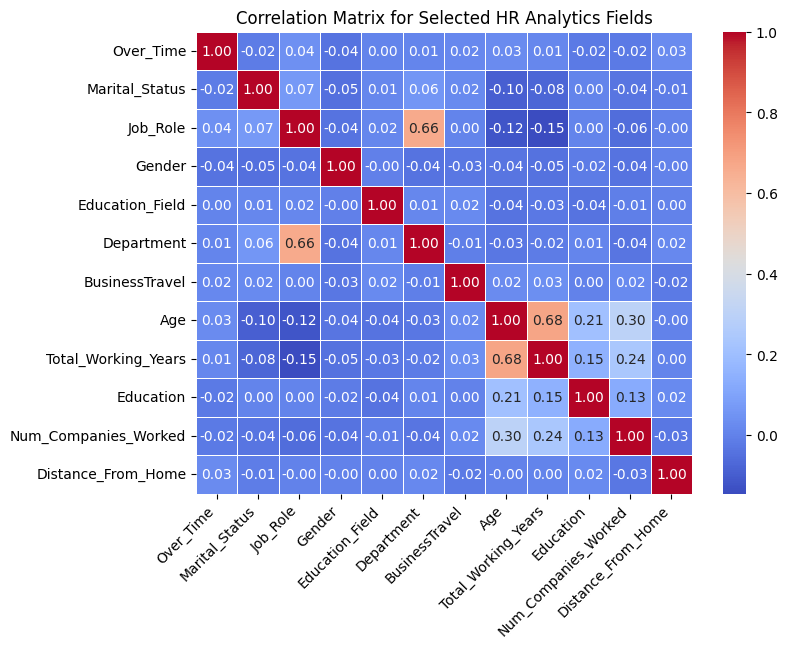

In [72]:
# Calculate the correlation matrix
correlation_matrix = subset_data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix for Selected HR Analytics Fields')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

### **Age distribution of employees**

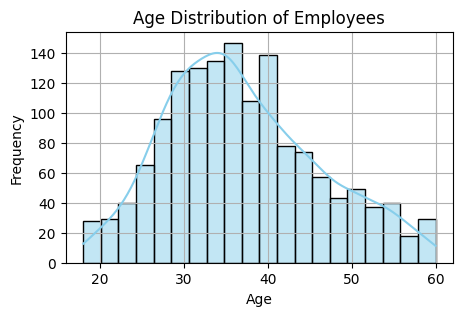

In [73]:
# Age Distribution
plt.figure(figsize=(5, 3))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### **Monthly Income Distribution among employees**

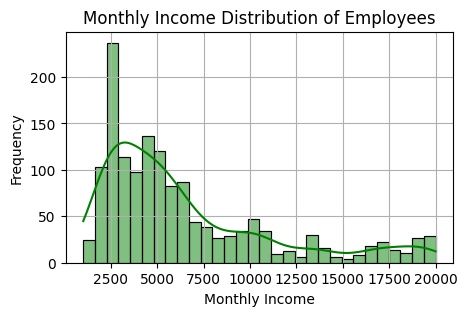

In [74]:
# Monthly Income Distribution
plt.figure(figsize=(5, 3))
sns.histplot(data['Monthly_Income'], bins=30, kde=True, color='green')
plt.title('Monthly Income Distribution of Employees')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### **Distribution of attrition across genders**

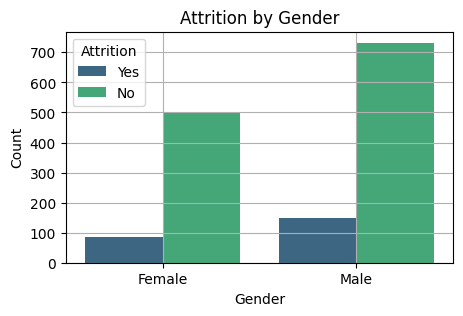

In [75]:
# Attrition by Gender
plt.figure(figsize=(5, 3))
sns.countplot(x='Gender', hue='Attrition', data=data, palette='viridis')
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)
plt.show()

### **Distribution of employees across different job roles**

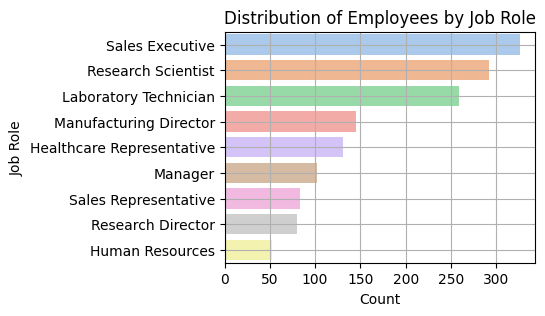

In [76]:
# Job Role Distribution
plt.figure(figsize=(4, 3))
sns.countplot(y='Job_Role', data=data, palette='pastel', order=data['Job_Role'].value_counts().index)
plt.title('Distribution of Employees by Job Role')
plt.xlabel('Count')
plt.ylabel('Job Role')
plt.grid(True)
plt.show()
warnings.filterwarnings("ignore", category=FutureWarning)

### **Attrition by Age**

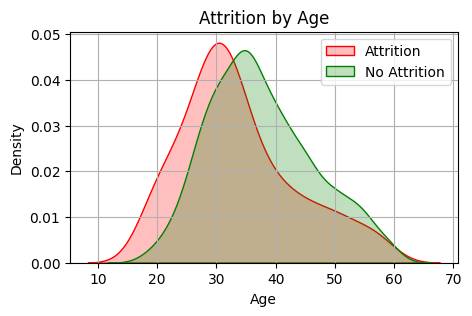

In [77]:
plt.figure(figsize=(5, 3))
sns.kdeplot(data[data['Attrition'] == 'Yes']['Age'], label='Attrition', shade=True, color='r')
sns.kdeplot(data[data['Attrition'] == 'No']['Age'], label='No Attrition', shade=True, color='g')
plt.title('Attrition by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()
warnings.filterwarnings("ignore", category=FutureWarning)

### **Attrition by Monthly Income**

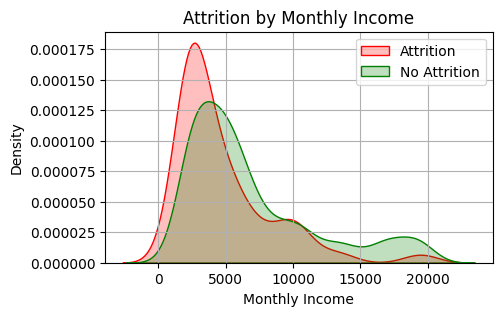

In [78]:
plt.figure(figsize=(5, 3))
sns.kdeplot(data[data['Attrition'] == 'Yes']['Monthly_Income'], label='Attrition', shade=True, color='r')
sns.kdeplot(data[data['Attrition'] == 'No']['Monthly_Income'], label='No Attrition', shade=True, color='g')
plt.title('Attrition by Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()
warnings.filterwarnings("ignore", category=FutureWarning)

### **Relationship Between Total Working Years and Monthly Income**

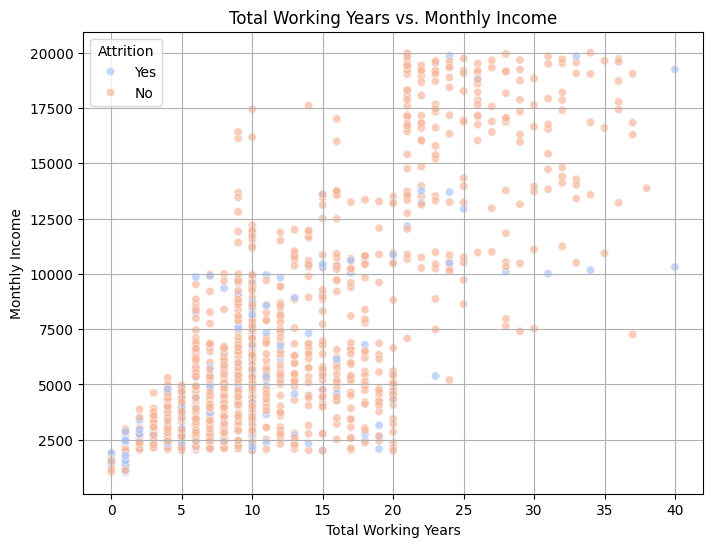

In [79]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total_Working_Years', y='Monthly_Income', hue='Attrition', data=data, palette='coolwarm', alpha=0.7)
plt.title('Total Working Years vs. Monthly Income')
plt.xlabel('Total Working Years')
plt.ylabel('Monthly Income')
plt.grid(True)
plt.show()